In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
qual = pd.read_csv("../map_quality_tables/data_quality_code_20.csv")

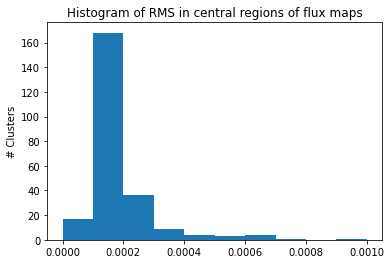

In [4]:
plt.hist(qual["rms_map"],bins=np.linspace(0,0.0010,11))
plt.title("Histogram of RMS in central regions of flux maps")
plt.ylabel("# Clusters")
plt.savefig("../analysis_plots/rms_map_hist.png")

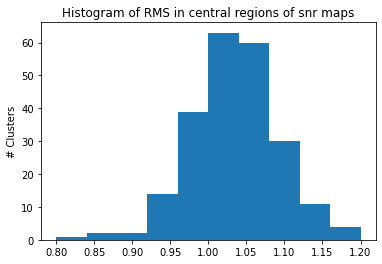

In [5]:
plt.hist(qual["rms_snr"],bins=np.linspace(0.8,1.2,11))
plt.title("Histogram of RMS in central regions of snr maps")
plt.ylabel("# Clusters")
plt.savefig("../analysis_plots/rms_snr_hist.png")

In [2]:
psrc = pd.read_csv("../psrc_lists/uncleaned_psrcs_sigma__2aspcmsubqm2_fitel_0f09-to-35f5Hz_qc_0p6rr_M_PdoCals_dt20_snr_iter1_4.0sigma.csv")
matched = pd.read_csv("../psrc_lists/matched_9arcsec_1and2_best1_vlass.csv")
unmatched = psrc.merge(matched,how="outer",left_on=["cluster","ra_deg","dec_deg","theta_1","theta_2"],right_on=["cluster","ra_deg","dec_deg","theta_1","theta_2"],indicator=True)
unmatched = unmatched.loc[unmatched["_merge"]=="left_only"]

In [7]:
theta_1 = 2.0
theta_2 = 6.0
f_psrc = psrc.loc[(psrc["theta_1"]==theta_1)&(psrc["theta_2"]==theta_2)]
f_matched = matched.loc[(matched["theta_1"]==theta_1)&(matched["theta_2"]==theta_2)]
f_unmatched = unmatched.loc[(unmatched["theta_1"]==theta_1)&(unmatched["theta_2"]==theta_2)]

In [18]:
f_psrc.columns

Index(['cluster', 'x', 'y', 'sigma_dog', 'theta_1', 'theta_2', 'ra_deg',
       'dec_deg', 'dist_center_radians', 'amp_fit', 'x_center_fit',
       'y_center_fit', 'sigma', 'int_flux_Jy', 'int_flux_err_Jy', 'amp_snr',
       'x_snr', 'y_snr', 'sigma_snr', 'snr', 'masked', 'noise_ps', 'hits_ps',
       'Unnamed: 0', 'Source', 'rms_map', 'rms_snr', 'avg_snr', 'ntail',
       'amp_fit_snr', 'mean_fit_snr', 'std_fit_snr', 'red_type'],
      dtype='object')

In [ ]:
plt.hist(f_psrc["amp_fit"]*1000,bins=50)
#plt.xlim(0,30)

(array([28., 44., 58., 64., 64., 34., 33., 31., 27., 14., 12.,  8., 12.,
         0.,  2.,  5.,  6.,  3.,  4.,  5.,  1.,  2.,  0.,  1.,  2.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.]),
 array([ 0.37128465,  0.73230113,  1.09331762,  1.4543341 ,  1.81535059,
         2.17636707,  2.53738356,  2.89840004,  3.25941653,  3.62043301,
         3.9814495 ,  4.34246599,  4.70348247,  5.06449896,  5.42551544,
         5.78653193,  6.14754841,  6.5085649 ,  6.86958138,  7.23059787,
         7.59161435,  7.95263084,  8.31364733,  8.67466381,  9.0356803 ,
         9.39669678,  9.75771327, 10.11872975, 10.47974624, 10.84076272,
        11.20177921, 11.56279569, 11.92381218, 12.28482867, 12.64584515,
        13.00686164, 13.36787812, 13.72889461, 14.08991109, 14.45092758,
        14.81194406, 15.17296055, 15.53397703, 15.89499352, 16.25601001,
        16.61702649, 16.97804298, 17.33905946, 17.70007595,

(0.0, 20.0)

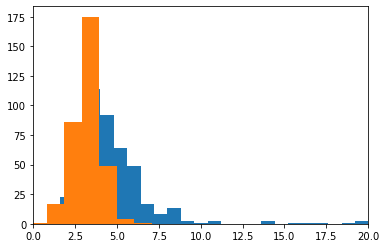

In [20]:
plt.hist(f_psrc["snr"],bins=50)
plt.hist(f_psrc["amp_snr"],bins=50)
plt.xlim(0,20)

In [8]:
len(f_matched)+len(f_unmatched) == len(f_psrc)

True

In [9]:
len(f_matched)

32

In [10]:
len(f_psrc)

467

In [11]:
len(f_matched)/len(f_psrc)

0.24096385542168675

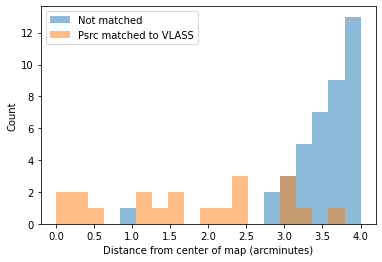

In [12]:
plt.hist(f_unmatched["dist_center_radians_x"]*180/np.pi*60,alpha=0.5,label="Not matched",bins=np.linspace(0,4,20))
plt.hist(f_matched["dist_center_radians"]*180/np.pi*60,alpha=0.5,label="Psrc matched to VLASS",bins=np.linspace(0,4,20))
plt.xlabel("Distance from center of map (arcminutes)")
plt.ylabel("Count")
plt.legend()
plt.savefig("../analysis_plots/dist_center_matched_unmatched.png")

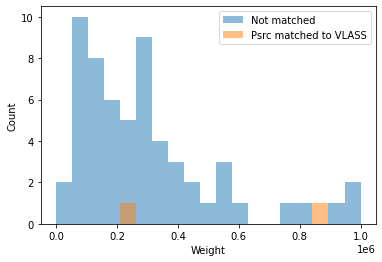

In [13]:
plt.hist(f_unmatched["hits_ps_x"],alpha=0.5,label="Not matched",bins=np.linspace(0,1e6,20))
plt.hist(f_matched["hits_ps"],alpha=0.5,label="Psrc matched to VLASS",bins=np.linspace(0,1e6,20))
plt.xlabel("Weight")
plt.ylabel("Count")
plt.legend()
plt.savefig("../analysis_plots/weight_matched_unmatched.png")

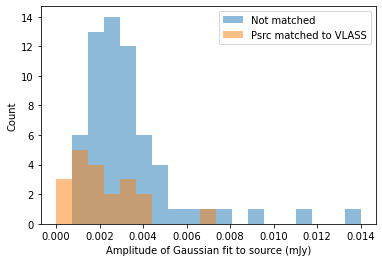

In [14]:
plt.hist(f_unmatched["amp_fit_x"],alpha=0.5,label="Not matched",bins=np.linspace(0,0.014,20))
plt.hist(f_matched["amp_fit"],alpha=0.5,label="Psrc matched to VLASS",bins=np.linspace(0,0.014,20))
plt.xlabel("Amplitude of Gaussian fit to source (mJy)")
plt.ylabel("Count")
plt.legend()
plt.savefig("../analysis_plots/amp_fit_matched_unmatched.png")

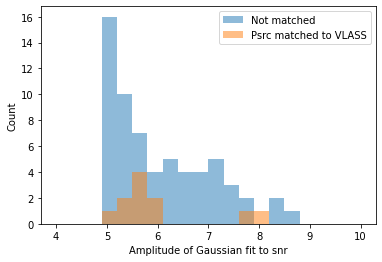

In [15]:
plt.hist(f_unmatched["amp_snr_x"],alpha=0.5,label="Not matched",bins=np.linspace(4,10,21))
plt.hist(f_matched["amp_snr"],alpha=0.5,label="Psrc matched to VLASS",bins=np.linspace(4,10,21))
plt.xlabel("Amplitude of Gaussian fit to snr")
plt.ylabel("Count")
plt.legend()
plt.savefig("../analysis_plots/amp_snr_matched_unmatched.png")

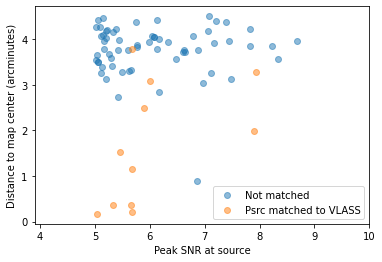

In [16]:
plt.scatter(f_unmatched["amp_snr_x"],f_unmatched["dist_center_radians_x"]*180/np.pi*60,alpha=0.5,label="Not matched")
plt.scatter(f_matched["amp_snr"],f_matched["dist_center_radians"]*180/np.pi*60,alpha=0.5,label="Psrc matched to VLASS")
plt.xlabel("Peak SNR at source")
plt.ylabel("Distance to map center (arcminutes)")
plt.legend()
plt.xlim(3.9,10)
plt.savefig("../analysis_plots/amp_snr_vs_dist_matched_unmatched.png")

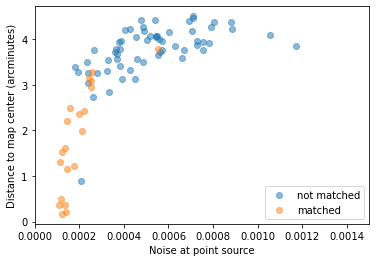

In [17]:
plt.scatter(f_unmatched["noise_ps_x"],f_unmatched["dist_center_radians_x"]*180/np.pi*60,alpha=0.5,label="not matched")
plt.scatter(f_matched["noise_ps"],f_matched["dist_center_radians"]*180/np.pi*60,alpha=0.5,label="matched")
plt.xlabel("Noise at point source")
plt.ylabel("Distance to map center (arcminutes)")
plt.xlim(0,0.0015)
plt.legend()
plt.savefig("../analysis_plots/noise_at_ps_vs_dist_matched_unmatched.png")

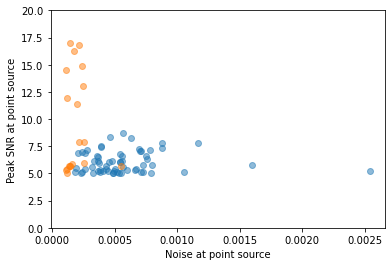

In [18]:
plt.scatter(np.abs(f_unmatched["noise_ps_x"]),f_unmatched["amp_snr_x"],alpha=0.5,label="not matched")
plt.scatter(np.abs(f_matched["noise_ps"]),f_matched["amp_snr"],alpha=0.5,label="matched")
plt.xlabel("Noise at point source")
plt.ylabel("Peak SNR at point source")
plt.ylim(0,20)
plt.savefig("../analysis_plots/noise_vs_peak_snr.jpeg")

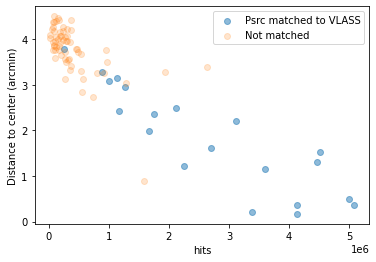

In [19]:
plt.scatter(f_matched["hits_ps"],f_matched["dist_center_radians"]*180/np.pi*60,alpha=0.5,label="Psrc matched to VLASS")
plt.scatter(f_unmatched["hits_ps_x"],f_unmatched["dist_center_radians_x"]*180/np.pi*60,alpha=0.2,label="Not matched")
plt.xlabel("hits")
plt.ylabel("Distance to center (arcmin)")
plt.legend()

In [21]:
reverse_search = pd.read_csv("../psrc_lists/reverse_search_2aspcmsubqm2_fitel_0f09-to-35f5Hz_qc_0p6rr_M_PdoCals_dt20_snr_iter1.csv")
not_found = reverse_search.merge(f_matched,how="outer",left_on=["cluster","Component_name","Component_id_x","ra_vlass","dec_vlass"],right_on=["cluster","Component_name","Component_id","RA","DEC"],indicator=True)
not_found = not_found.loc[not_found["_merge"]=="left_only"]

In [22]:
len(not_found)+len(f_matched) == len(reverse_search)

True

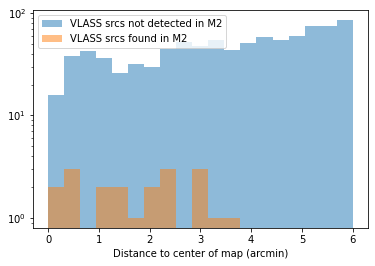

In [23]:
plt.hist(not_found["Separation_x"]/60,label="VLASS srcs not detected in M2",alpha=0.5,bins=np.linspace(0,6,20))
plt.hist(f_matched["dist_center_radians"]*180/np.pi*60, label="VLASS srcs found in M2",alpha=0.5,bins=np.linspace(0,6,20))
plt.xlabel("Distance to center of map (arcmin)")
plt.yscale("log")
plt.legend()
plt.savefig("../analysis_plots/dist_center_maps_found_notfound.png")

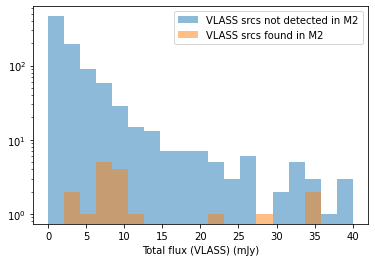

In [24]:
plt.hist(not_found["Total_flux_x"],label="VLASS srcs not detected in M2",bins=np.linspace(0,40,20),alpha=0.5)
plt.hist(f_matched["Total_flux"], label="VLASS srcs found in M2",bins=np.linspace(0,40,20),alpha=0.5)
plt.xlabel("Total flux (VLASS) (mJy)")
plt.yscale("log")
plt.legend()
plt.savefig("../analysis_plots/vlass_total_flux_found_notfound.png")

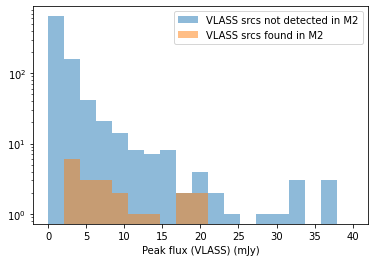

In [25]:
plt.hist(not_found["Peak_flux_x"],label="VLASS srcs not detected in M2",bins=np.linspace(0,40,20),alpha=0.5)
plt.hist(f_matched["Peak_flux"], label="VLASS srcs found in M2",bins=np.linspace(0,40,20),alpha=0.5)
plt.xlabel("Peak flux (VLASS) (mJy)")
plt.yscale("log")
plt.legend()
plt.savefig("../analysis_plots/vlass_peak_flux_found_notfound.png")

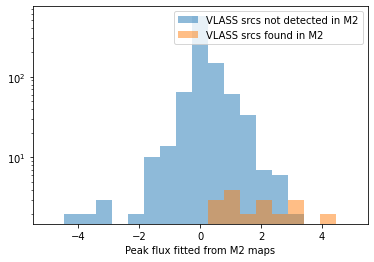

In [26]:
plt.hist(not_found["amp_map"]*1000,label="VLASS srcs not detected in M2",alpha=0.5,bins=np.linspace(-5,5,20))
plt.hist(f_matched["amp_fit"]*1000, label="VLASS srcs found in M2",alpha=0.5,bins=np.linspace(-5,5,20))
plt.xlabel("Peak flux fitted from M2 maps")
plt.yscale("log")
plt.legend()
plt.savefig("../analysis_plots/m2_peak_flux_found_notfound.png")

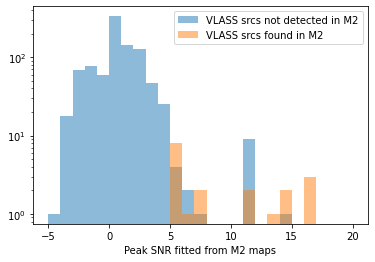

In [27]:
plt.hist(not_found["amp_snr_x"],label="VLASS srcs not detected in M2",alpha=0.5,bins=np.linspace(-5,20,26))
plt.hist(f_matched["amp_snr"], label="VLASS srcs found in M2",alpha=0.5,bins=np.linspace(-5,20,26))
plt.xlabel("Peak SNR fitted from M2 maps")
plt.yscale("log")
plt.legend()
plt.savefig("../analysis_plots/m2_peak_snr_found_notfound.png")

Text(0, 0.5, 'Distance to center (arcmin)')

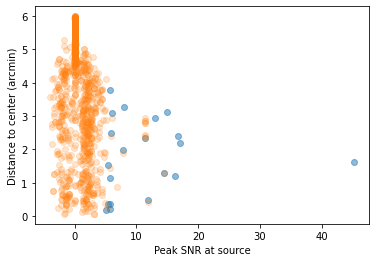

In [28]:
plt.scatter(f_matched["amp_snr"],f_matched["dist_center_radians"]*180/np.pi*60,alpha=0.5,)
plt.scatter(not_found["amp_snr_x"],not_found["Separation_x"]/60,alpha=0.2)
plt.xlabel("Peak SNR at source")
plt.ylabel("Distance to center (arcmin)")